# ELE 435-535 Computational HW 1

### Due: 9/24/2018 11:59 PM

### Importing required Python packages

In [1]:
# Import additional packages if needed.
import numpy as np
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline


### Part 1: Getting started with Numpy 

1) Create a 5 x 5 array (A) with random values sampled from Gaussian distribution with zero mean and unit variance. Then print A. Suggestion: numpy has a built-in command for generating random arrays.

In [2]:
A = np.random.standard_normal(25)
A=np.reshape(A,(5,5))
A

array([[ 0.81820371, -1.33905963, -2.26206748, -1.1503282 , -0.00439756],
       [ 0.48207196, -0.37782358,  0.85670357, -1.27209514,  0.98958675],
       [-1.07286476,  1.05620842, -0.40289844, -0.92586252,  1.67974676],
       [ 0.16569871, -0.78948315, -0.50098783, -0.88518688, -0.25557564],
       [ 1.05943328, -0.85375566, -0.11648877,  0.35765044,  0.38671   ]])

2) Set the element in the $2^{nd}$ row and $3^{rd}$ column of A to be 1 and print the result. Suggestion: check out how to index the elements of a numpy array.

In [3]:
A[1,2]=1
print(A)


[[ 0.81820371 -1.33905963 -2.26206748 -1.1503282  -0.00439756]
 [ 0.48207196 -0.37782358  1.         -1.27209514  0.98958675]
 [-1.07286476  1.05620842 -0.40289844 -0.92586252  1.67974676]
 [ 0.16569871 -0.78948315 -0.50098783 -0.88518688 -0.25557564]
 [ 1.05943328 -0.85375566 -0.11648877  0.35765044  0.38671   ]]


3) Create a 5 x 5 identity array (B) and print it. Suggestion: numpy has a built in command for generating identity matrices.

In [4]:
B=np.identity(5)
B

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [5]:
r=0
c=-1
for i in range(4):
    r=r+1
    c=c+1
    B[r,c]=(i+1)
B

array([[1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [0., 2., 1., 0., 0.],
       [0., 0., 3., 1., 0.],
       [0., 0., 0., 4., 1.]])

5) Multiply A and B (matrix multiplication, not point-wise multiplication) to create C (note that A and B are 2D arrays, not matrices). Suggestion: numpy hasd a built-in command for matrix multiplication.

In [6]:
C=np.matmul(A,B)
C

array([[-5.20855919e-01, -5.86319458e+00, -5.71305208e+00,
        -1.16791845e+00, -4.39756101e-03],
       [ 1.04248386e-01,  1.62217642e+00, -2.81628542e+00,
         2.68625185e+00,  9.89586747e-01],
       [-1.66563340e-02,  2.50411544e-01, -3.18048600e+00,
         5.79312450e+00,  1.67974676e+00],
       [-6.23784433e-01, -1.79145880e+00, -3.15654846e+00,
        -1.90748943e+00, -2.55575637e-01],
       [ 2.05677616e-01, -1.08673320e+00,  9.56462550e-01,
         1.90449044e+00,  3.86710001e-01]])

6) Create a new array D according to the formula below:
\begin{equation}
D = \sum_{i=1}^5 A_i*B_i \hspace{10mm} (A_i: i^{th} \hspace{3mm} column \hspace{3mm} of \hspace{3mm} A, \hspace{3mm} B_i: i^{th} \hspace{3mm} row \hspace{3mm} of \hspace{3mm} B)   \\
\end{equation}

In [7]:
D=0
i=0
for i in range(5):
    a=A[:,i]
    b=B[i,:]
    a=np.reshape(a,(5,1))
    b=np.reshape(b,(1,5))
    sumx=np.matmul(a,b)
    D=D+sumx
    

7) Verify that C and D are equal. Suggestion: a==b checks equality.

In [8]:
C==D



array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

### Part 2: Implementation of nearest class mean classifier

In this part, you will implement nearest class mean classifier using the MNIST dataset for handwritten digits. These are 28 x 28  2D grayscale images of hand written digits. When you load the given file MNISTcwtrain1000.npy, you will get a 784 x 10000 numpy array, which you are to use as the training samples and another 784 x 1000 array (from MNISTcwtest100.npy) which is to be used as test samples. You can find more information on http://yann.lecun.com/exdb/mnist/.

Each column in the training and test arrays are 784-pixel (784 = 28 * 28) column-wise vectorized images of handwritten digits (digits 0~9). For the training array, the first 1000 columns are column-wise vectorized images of the digit 0, the next 1000 columns are images of digit 1, and so on up to the last 1000 columns which are images of digit 9. Similarly, for the test array, the first 100 columns are vectorized images of digit 0, the next 100 columns correspond to digit 1, etc.

1) Load the MNISTcwtrain1000.npy (training examples) and MNISTcwtest100.npy (test examples). Cast the resulting arrays to 'uint8 (unsigned integers of 8-bits)' format.

In [9]:
train=np.load('MNISTcwtrain1000.npy')
test=np.load('MNISTcwtest100.npy')
train=train.astype('uint8')
test=test.astype('uint8')


2) Print the dimensions of training data and test data.

In [10]:
print(train.shape)
print(test.shape)

(784, 10000)
(784, 1000)


3) Compute the mean vector of each digit of training examples (mean of the first 1000 columns of training examples corresponds to digit 0, mean of the next 1000 columns corresponds to digit 1, etc.)

In [11]:
sumx_0=train[:,0:1000].sum(axis=1)/1000
sumx_1=train[:,1000:2000].sum(axis=1)/1000
sumx_2=train[:,2000:3000].sum(axis=1)/1000
sumx_3=train[:,3000:4000].sum(axis=1)/1000
sumx_4=train[:,4000:5000].sum(axis=1)/1000
sumx_5=train[:,5000:6000].sum(axis=1)/1000
sumx_6=train[:,6000:7000].sum(axis=1)/1000
sumx_7=train[:,7000:8000].sum(axis=1)/1000
sumx_8=train[:,8000:9000].sum(axis=1)/1000
sumx_9=train[:,9000:10000].sum(axis=1)/1000


4) Using the function below, convert the mean-vector of each digit (computed from part (3)) into a 28 x 28, 2D-array and plot the corresponding two dimensional images (using 'imshow').  

In [12]:
# Function that converts a 1D vectorized image into a (nr x nc) 2D array
def unpackcw(x,nr,nc):
    A = x.reshape(nc,nr)
    return A.T


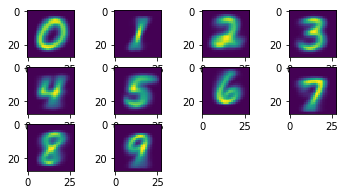

In [13]:
class0=unpackcw(sumx_0,28,28)
plt.subplot(4,4,1)
plt.imshow(class0)

class1=unpackcw(sumx_1,28,28)
plt.subplot(4,4,2)
plt.imshow(class1)

class2=unpackcw(sumx_2,28,28)
plt.subplot(4,4,3)
plt.imshow(class2)

class3=unpackcw(sumx_3,28,28)
plt.subplot(4,4,4)
plt.imshow(class3)

class4=unpackcw(sumx_4,28,28)
plt.subplot(4,4,5)
plt.imshow(class4)

class5=unpackcw(sumx_5,28,28)
plt.subplot(4,4,6)
plt.imshow(class5)

class6=unpackcw(sumx_6,28,28)
plt.subplot(4,4,7)
plt.imshow(class6)

class7=unpackcw(sumx_7,28,28)
plt.subplot(4,4,8)
plt.imshow(class7)

class8=unpackcw(sumx_8,28,28)
plt.subplot(4,4,9)
plt.imshow(class8)

class9=unpackcw(sumx_9,28,28)
plt.subplot(4,4,10)
plt.imshow(class9)

5) Using vector-means from part (3), implement the nearest class mean classifier. What are the training and test accuracies?

In [14]:
def calcdist(findclass,trueclass):
    dist=trueclass-findclass
    dist=np.square(dist).sum(axis=0)
    dist=np.sqrt(dist)
    return dist




In [15]:
#for class0,q=0,N=0
#for class1,q=100,N=1
#for class2,q=200,N=2

testacc=0

for l in range(10):
    if l==0:
        q=0
        N=0
    elif l==1:
        q=100
        N=1
    elif l==2:
        q=200
        N=2
    elif l==3:
        q=300
        N=3
    elif l==4:
        q=400
        N=4
    elif l==5:
        q=500
        N=5
    elif l==6:
        q=600
        N=6
    elif l==7:
        q=700
        N=7
    elif l==8:
        q=800
        N=8
    elif l==9:
        q=900
        N=9   
    
 
    accu1=0
    k=0
    d0=0
    d1=0
    d2=0
    d3=0
    d4=0
    d5=0
    d6=0
    d7=0
    d8=0
    d9=0


    for k in range (100):

        findclass=test[:,k+q:k+1+q]
    
        sumx_0=np.reshape(sumx_0,(784,1))
        sumx_1=np.reshape(sumx_1,(784,1))
        sumx_2=np.reshape(sumx_2,(784,1))
        sumx_3=np.reshape(sumx_3,(784,1))
        sumx_4=np.reshape(sumx_4,(784,1))
        sumx_5=np.reshape(sumx_5,(784,1))
        sumx_6=np.reshape(sumx_6,(784,1))
        sumx_7=np.reshape(sumx_7,(784,1))
        sumx_8=np.reshape(sumx_8,(784,1))
        sumx_9=np.reshape(sumx_9,(784,1))

        d0=calcdist(findclass,sumx_0)
        d1=calcdist(findclass,sumx_1)
        d2=calcdist(findclass,sumx_2)
        d3=calcdist(findclass,sumx_3)
        d4=calcdist(findclass,sumx_4)
        d5=calcdist(findclass,sumx_5)
        d6=calcdist(findclass,sumx_6)
        d7=calcdist(findclass,sumx_7)
        d8=calcdist(findclass,sumx_8)
        d9=calcdist(findclass,sumx_9)

        d=(d0,d1,d2,d3,d4,d5,d6,d7,d8,d9)
        X = d.index(min(d))
  
    
        if X==N:
            accu1=accu1+1

    testacc=testacc+accu1
    

    
print(testacc/10)
    


76.7


In [19]:
trainacc=0

for l in range(10):
    if l==0:
        q=0
        N=0
    elif l==1:
        q=1000
        N=1
    elif l==2:
        q=2000
        N=2
    elif l==3:
        q=3000
        N=3
    elif l==4:
        q=4000
        N=4
    elif l==5:
        q=5000
        N=5
    elif l==6:
        q=6000
        N=6
    elif l==7:
        q=7000
        N=7
    elif l==8:
        q=8000
        N=8
    elif l==9:
        q=9000
        N=9   
    
 
    accu1=0
    k=0
    d0=0
    d1=0
    d2=0
    d3=0
    d4=0
    d5=0
    d6=0
    d7=0
    d8=0
    d9=0


    for k in range (1000):

        findclass=train[:,k+q:k+1+q]
    
        sumx_0=np.reshape(sumx_0,(784,1))
        sumx_1=np.reshape(sumx_1,(784,1))
        sumx_2=np.reshape(sumx_2,(784,1))
        sumx_3=np.reshape(sumx_3,(784,1))
        sumx_4=np.reshape(sumx_4,(784,1))
        sumx_5=np.reshape(sumx_5,(784,1))
        sumx_6=np.reshape(sumx_6,(784,1))
        sumx_7=np.reshape(sumx_7,(784,1))
        sumx_8=np.reshape(sumx_8,(784,1))
        sumx_9=np.reshape(sumx_9,(784,1))

        d0=calcdist(findclass,sumx_0)
        d1=calcdist(findclass,sumx_1)
        d2=calcdist(findclass,sumx_2)
        d3=calcdist(findclass,sumx_3)
        d4=calcdist(findclass,sumx_4)
        d5=calcdist(findclass,sumx_5)
        d6=calcdist(findclass,sumx_6)
        d7=calcdist(findclass,sumx_7)
        d8=calcdist(findclass,sumx_8)
        d9=calcdist(findclass,sumx_9)

        d=(d0,d1,d2,d3,d4,d5,d6,d7,d8,d9)
        X = d.index(min(d))
  
    
        if X==N:
            accu1=accu1+1

    trainacc=trainacc+accu1
    

    
print(trainacc/100)

80.38
